In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [7]:
# read data
X_train = pd.read_csv('data/X_train.csv')
X_val   = pd.read_csv('data/X_val.csv')
X_test  = pd.read_csv('data/X_test.csv')

y_train = pd.read_csv('data/y_train.csv')
y_val   = pd.read_csv('data/y_val.csv')
y_test  = pd.read_csv('data/y_test.csv')

# check data
print("Shapes:")
print("  X_train:", X_train.shape, " y_train:", y_train.shape)
print("  X_val  :", X_val.shape,   " y_val  :", y_val.shape)
print("  X_test :", X_test.shape,  " y_test :", y_test.shape)


y_train = y_train.astype(int)
y_val   = y_val.astype(int)
y_test  = y_test.astype(int)




Shapes:
  X_train: (766956, 74)  y_train: (766956, 1)
  X_val  : (328696, 74)  y_val  : (328696, 1)
  X_test : (273914, 74)  y_test : (273914, 1)


EDA analysis

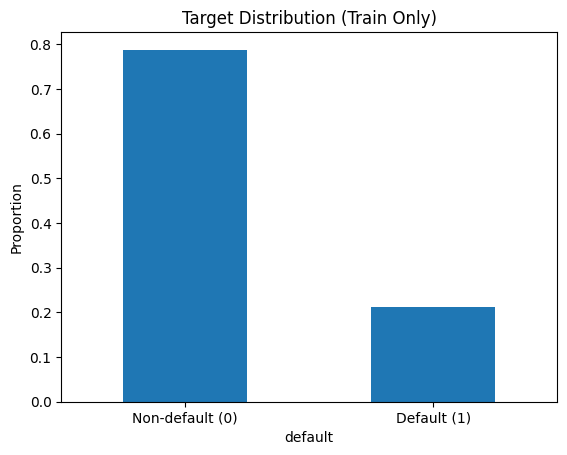

    issue_year  total_loans  total_defaults  default_rate
0         2007          357              94      0.263305
1         2008         1348             272      0.201780
2         2009         2992             430      0.143717
3         2010         6957             974      0.140003
4         2011        12169            1855      0.152437
5         2012        29872            4828      0.161623
6         2013        74994           11586      0.154492
7         2014       125046           23243      0.185876
8         2015       211228           43120      0.204140
9         2016       167058           41099      0.246016
10        2017        99496           26304      0.264372
11        2018        35439            9058      0.255594


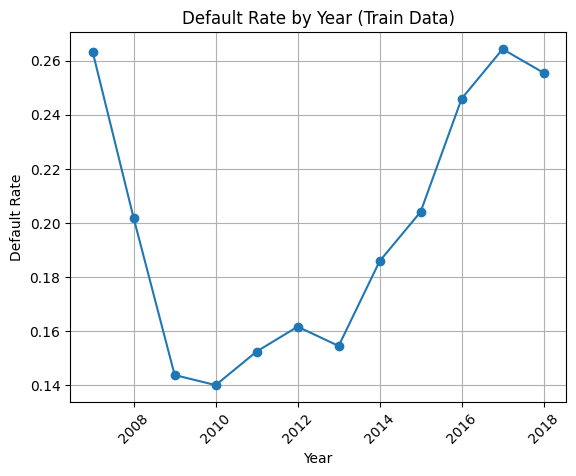

In [11]:
# objectives distribution
y_train.value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title("Target Distribution (Train Only)")
plt.xticks([0,1], ["Non-default (0)", "Default (1)"], rotation=0)
plt.ylabel("Proportion")
plt.show()

# default rate by 'issued_d'
train_df = pd.concat([X_train, y_train], axis=1)  # axis=1 表示横向拼接
train_df['issue_d'] = pd.to_datetime(train_df['issue_d'])
train_df['issue_year'] = X_train['issue_d'].dt.year

default_summary = train_df.groupby('issue_year')['default'].agg(
    total_loans='count',      # loan count
    total_defaults='sum',     # total defaults
    default_rate='mean'       # rate of defaults
).reset_index()

print(default_summary)
# Plotting the default rate by year
plt.title("Default Rate by Year (Train Data)")
plt.plot(default_summary['issue_year'], default_summary['default_rate'], marker='o')
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.grid()
plt.show()



check the distribution of each feature and their distribution based on 'default rate'

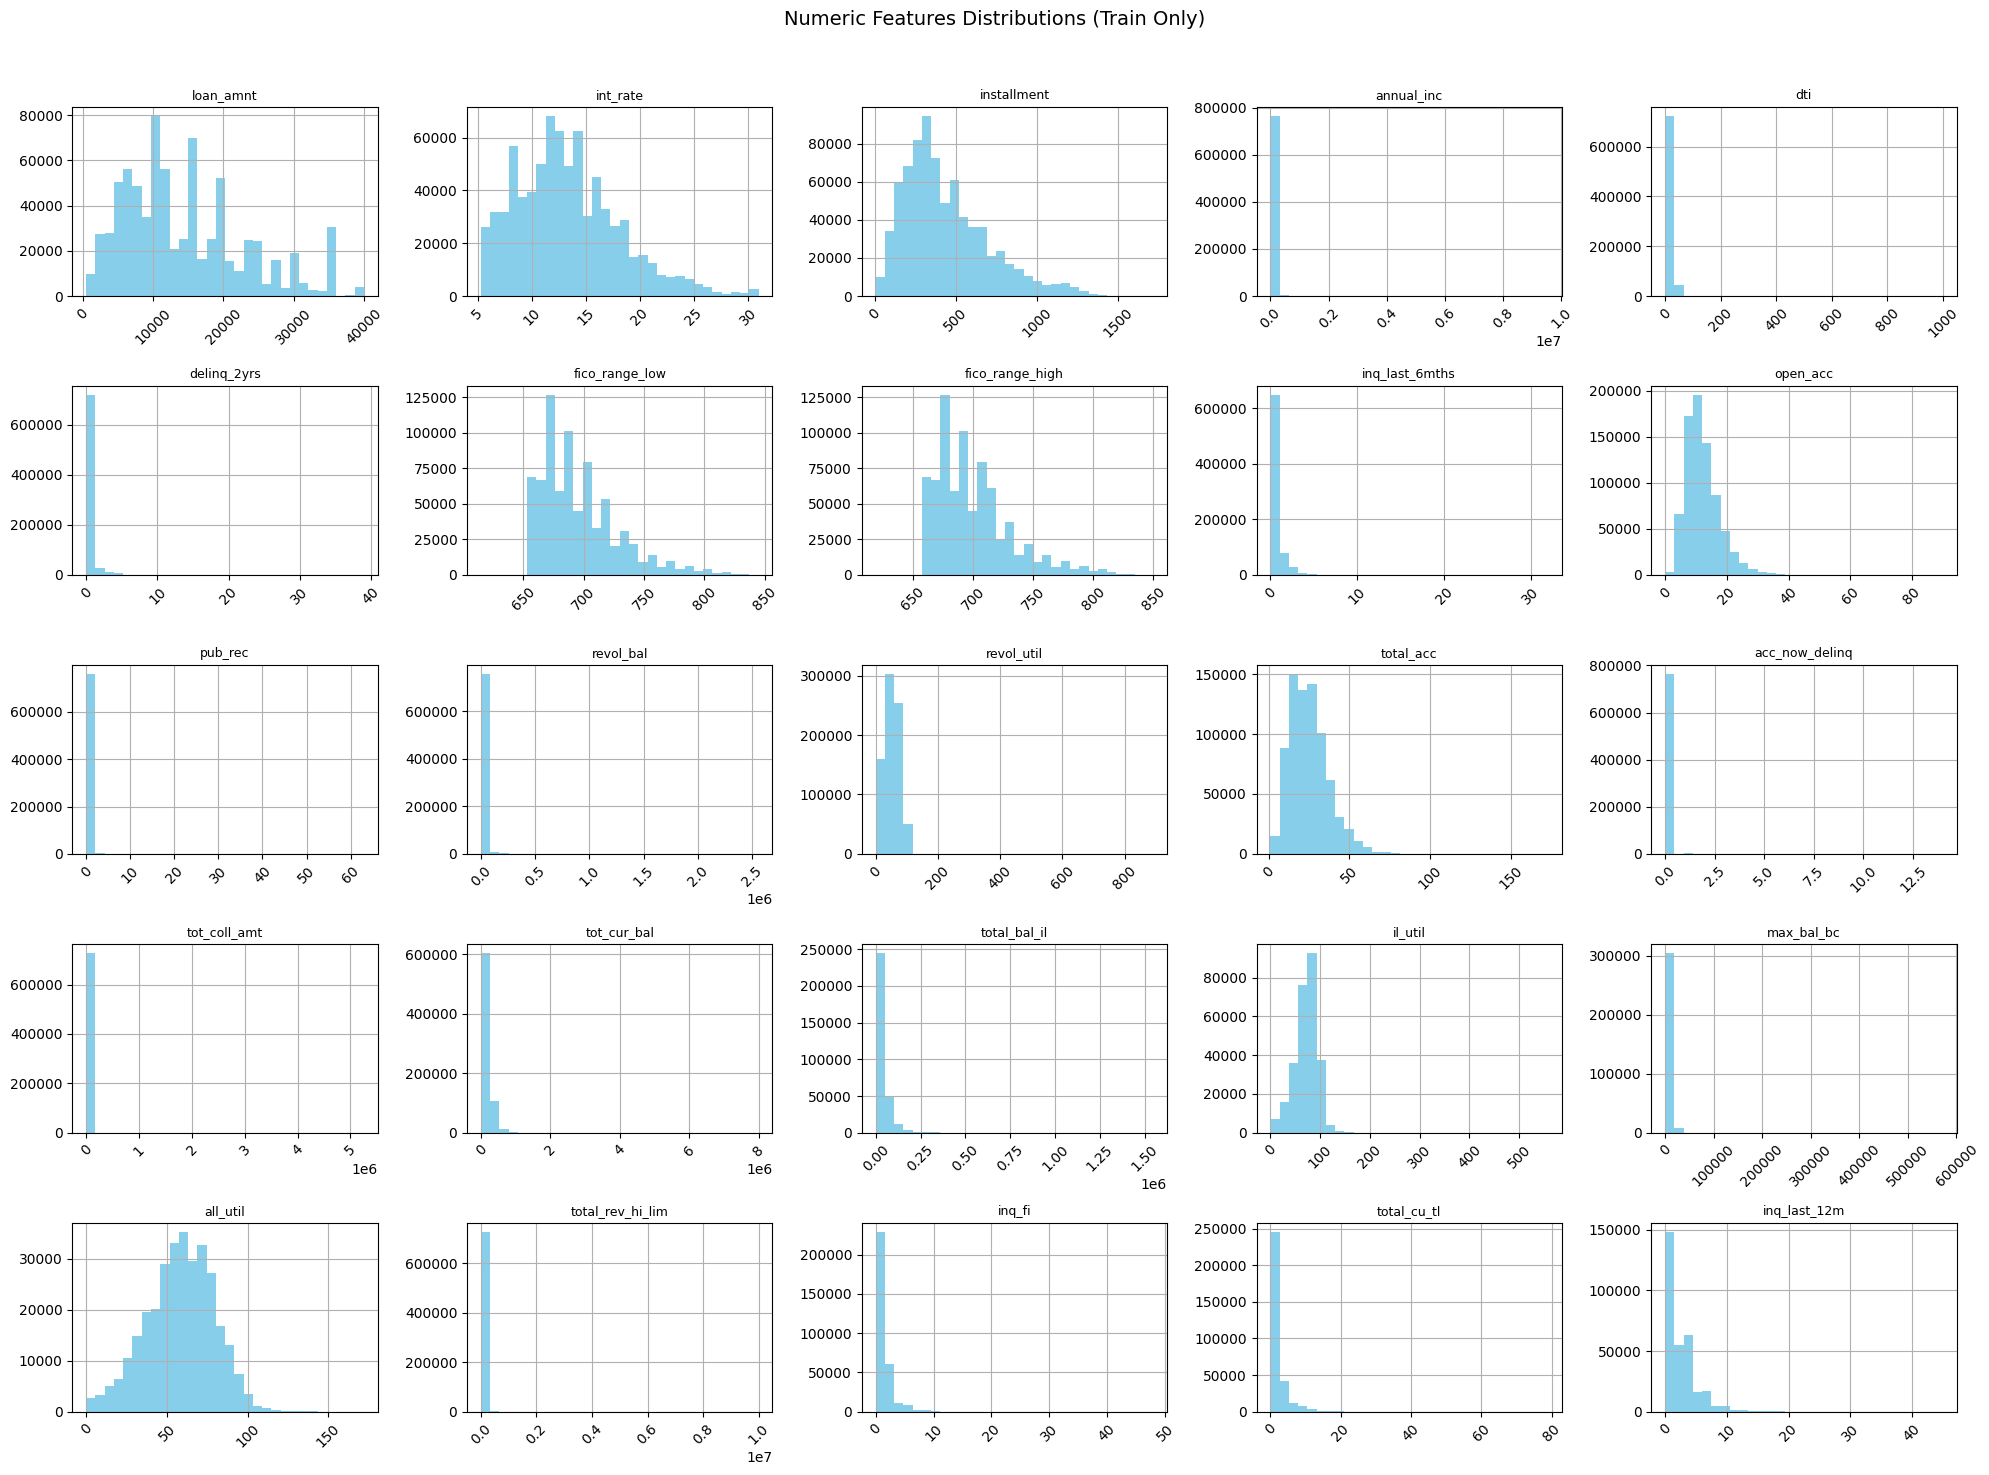

/var/folders/xg/6886p3rj5kb44k2smttjctf80000gn/T/ipykernel_72956/2589113407.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([data0, data1], labels=['0','1'], showfliers=False)  # Fixed line
/var/folders/xg/6886p3rj5kb44k2smttjctf80000gn/T/ipykernel_72956/2589113407.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([data0, data1], labels=['0','1'], showfliers=False)  # Fixed line
/var/folders/xg/6886p3rj5kb44k2smttjctf80000gn/T/ipykernel_72956/2589113407.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([data0, data1], labels=['0','1'], showfliers=False)  # Fix

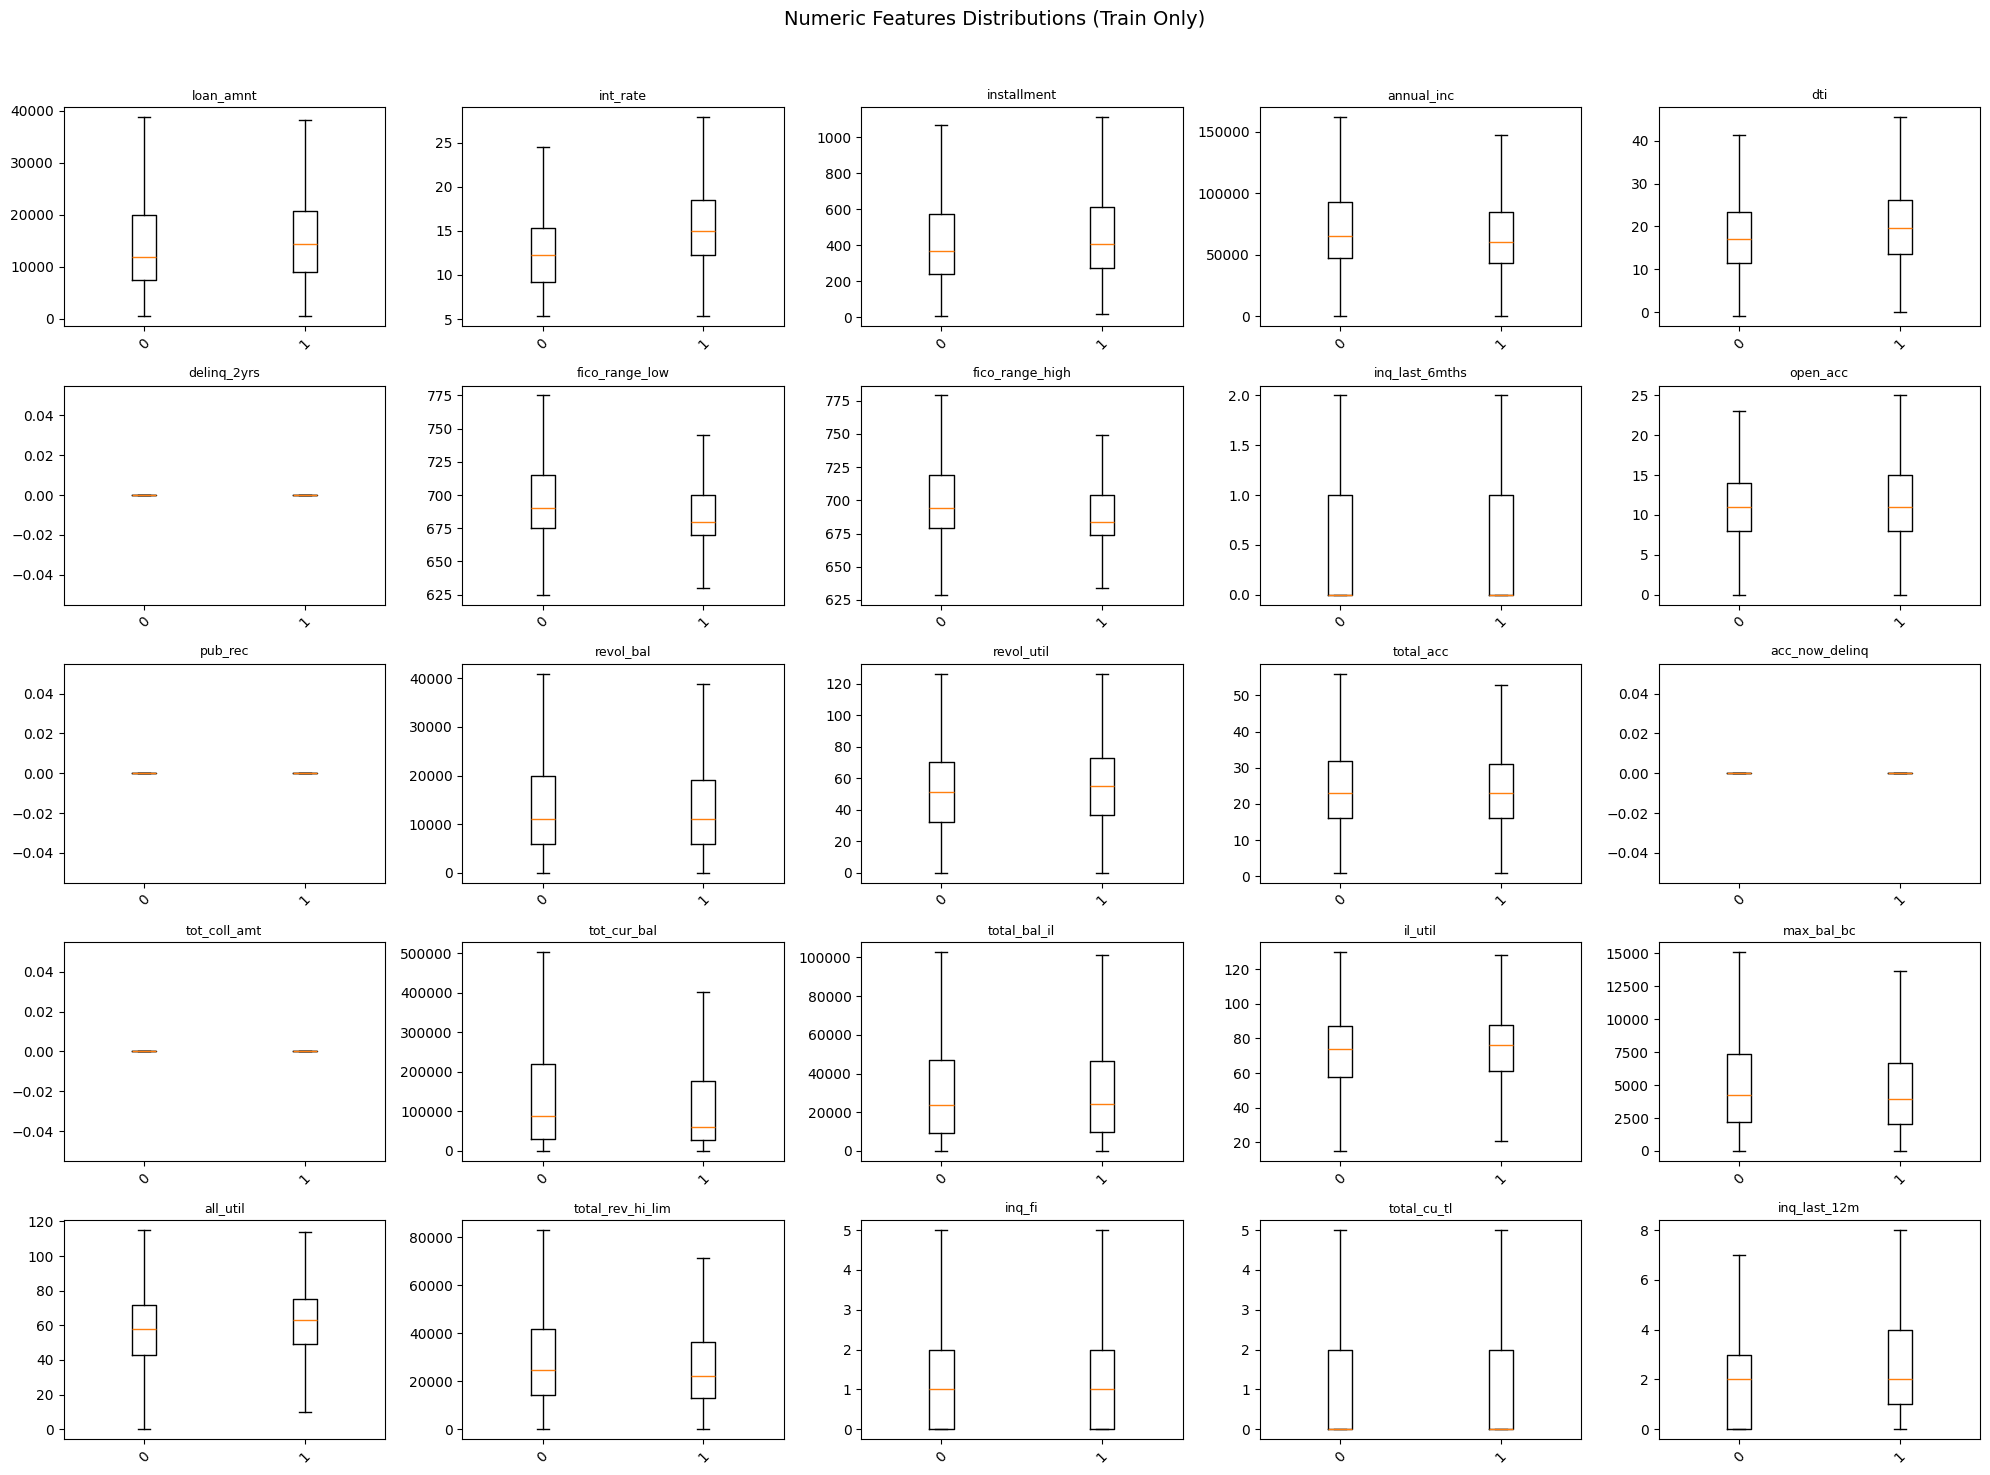

In [12]:
# numeric features distributions
num_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

show_cols = num_cols[:25] if len(num_cols) > 10 else num_cols 

# figure 1 : subplots of numeric features distributions
n_cols = 5  
n_rows = int(np.ceil(len(show_cols) / n_cols))

fig1, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
axes = axes.flatten()

for i, col in enumerate(show_cols):
    train_df[col].hist(bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=9)
    axes[i].tick_params(axis='x', labelrotation=45)

fig1.suptitle("Numeric Features Distributions (Train Only)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# figure 2 : boxplots of numeric features distributions by default status
fig2, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
axes = axes.flatten()

for i, col in enumerate(show_cols):
    data0 = train_df.loc[train_df['default']== 0, col].dropna()
    data1 = train_df.loc[train_df['default']== 1, col].dropna()
    if len(data0) > 0 and len(data1) > 0:
        axes[i].boxplot([data0, data1], labels=['0','1'], showfliers=False)  # Fixed line
        axes[i].set_title(col, fontsize=9)
        axes[i].tick_params(axis='x', labelrotation=45)

fig2.suptitle("Numeric Features Distributions (Train Only)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

application_type - Levels: 2, Top Levels: ['Individual', 'Joint App'], Default Rate:
application_type
Joint App     0.302377
Individual    0.210465
Name: default, dtype: float64
debt_settlement_flag - Levels: 2, Top Levels: ['N', 'Y'], Default Rate:
debt_settlement_flag
Y    0.999741
N    0.192023
Name: default, dtype: float64
disbursement_method - Levels: 2, Top Levels: ['Cash', 'DirectPay'], Default Rate:
disbursement_method
DirectPay    0.257198
Cash         0.212107
Name: default, dtype: float64
emp_length - Levels: 11, Top Levels: ['10+ years', '2 years', '< 1 year', '3 years', '1 year', '5 years', '4 years', '6 years', '8 years', '7 years', '9 years'], Default Rate:
emp_length
< 1 year     0.218448
1 year       0.218307
3 years      0.213131
2 years      0.212565
9 years      0.211164
4 years      0.211069
8 years      0.210057
5 years      0.208286
6 years      0.205269
7 years      0.202524
10+ years    0.200000
Name: default, dtype: float64
grade - Levels: 7, Top Levels: ['B',

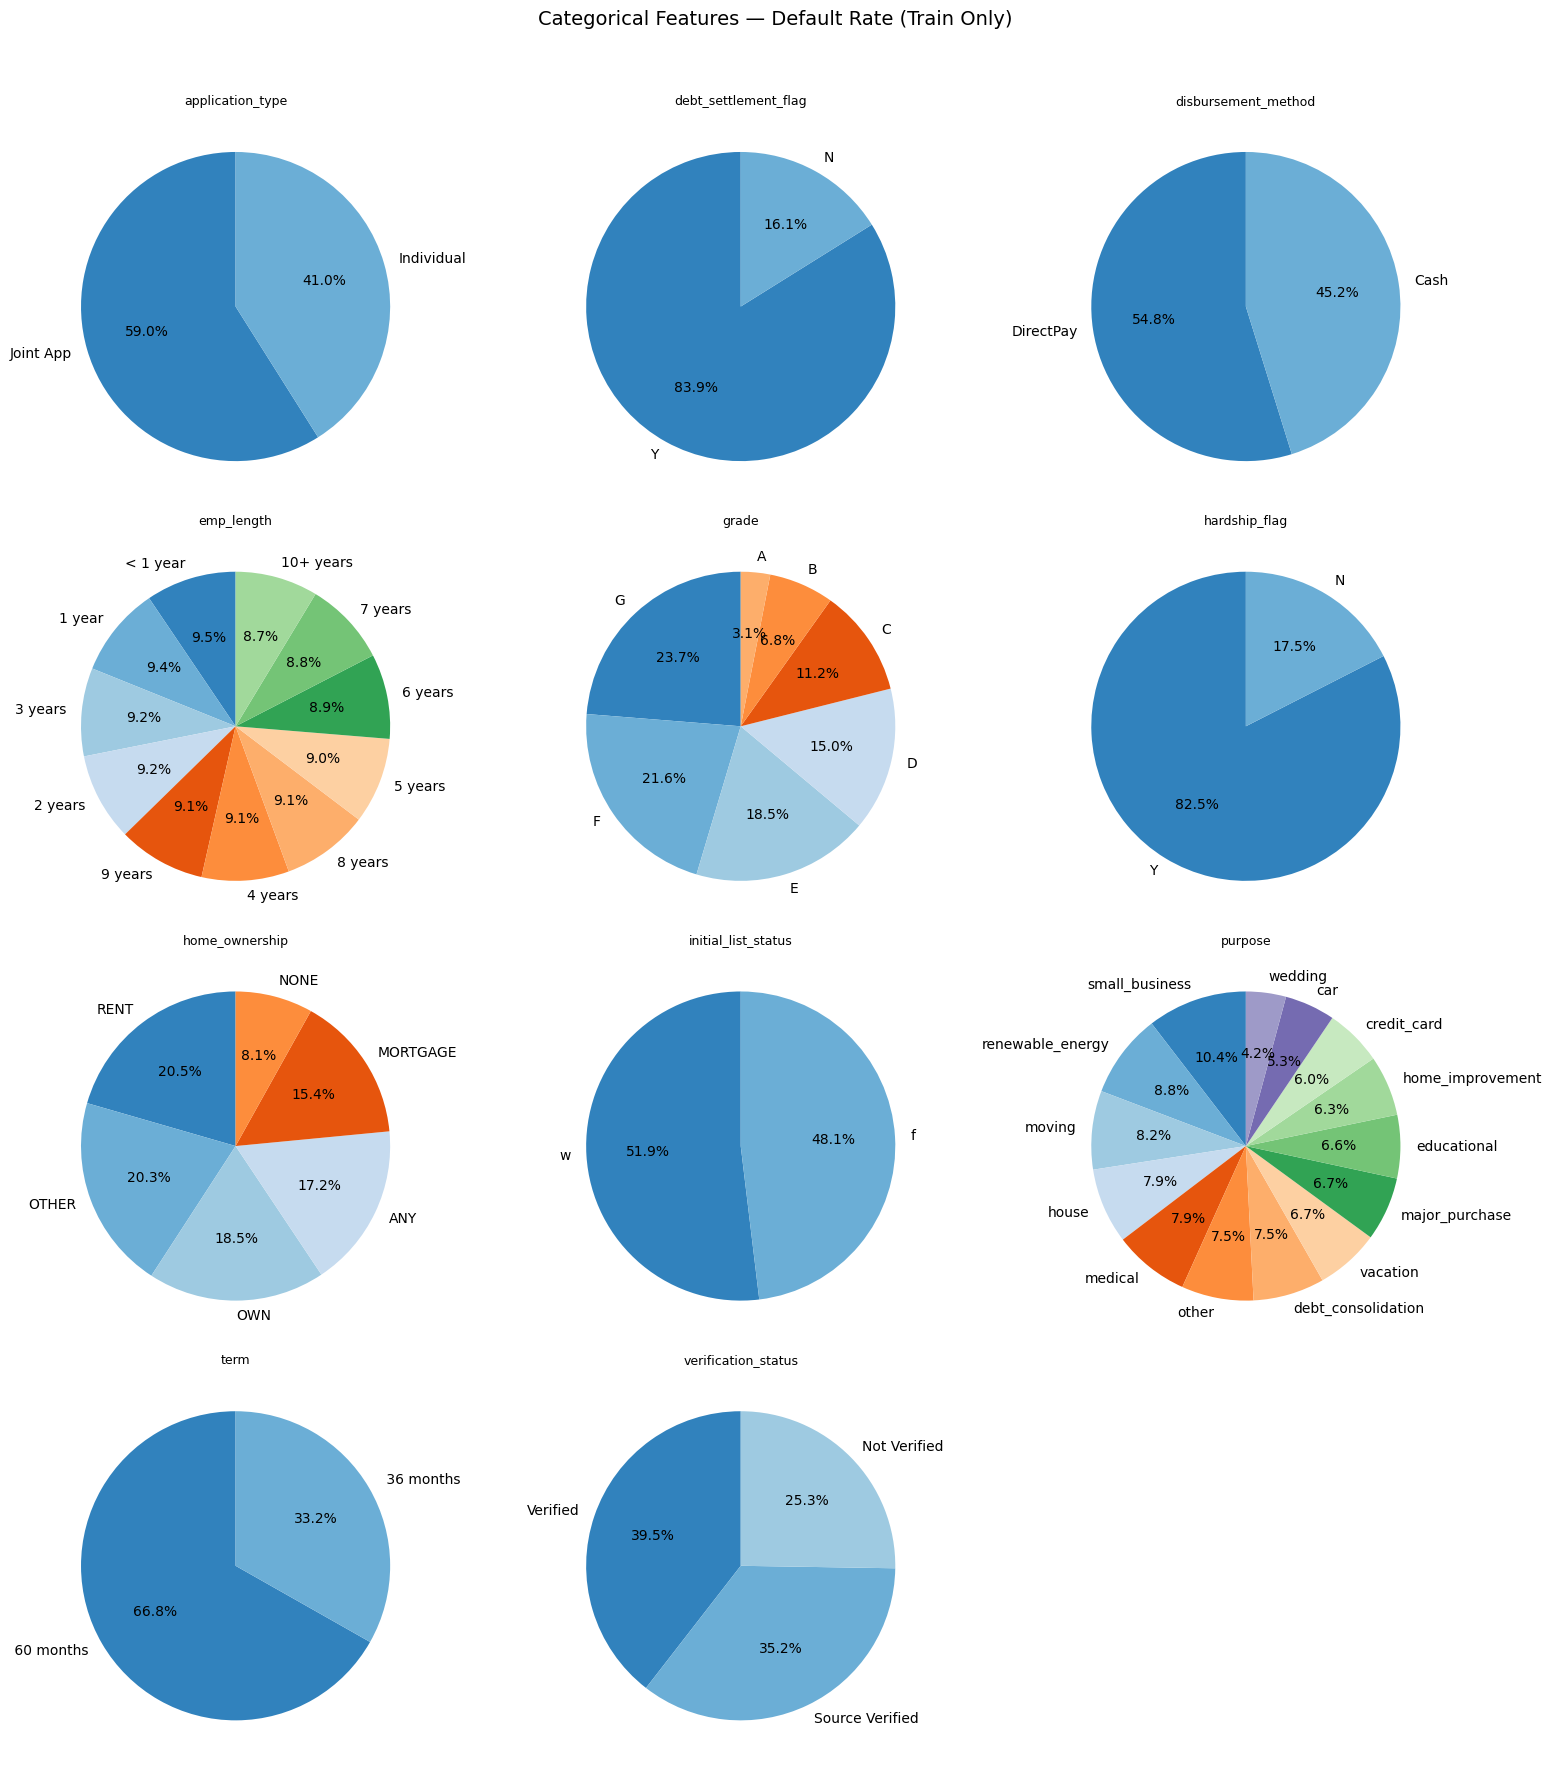

In [123]:
# categorical features distributions
cat_cols = X_train.columns.difference(num_cols).tolist()
cat_list = [col for col in cat_cols if X_train[col].nunique(dropna=True) < MAX_LEVELS and levels > 0]  # Exclude columns with only one unique value
# cat_list without def
MAX_LEVELS = 20  # Maximum number of levels to display
n_cols = 3  
n_rows = int(np.ceil(len(cat_cols) / n_cols))

fig, axes = plt.subplots(4, n_cols, figsize=(16, 3*n_rows))
fig.suptitle("Default Rate by Categorical Features", y=1.02, fontsize=14)

axes = axes.flatten()

for i, col in enumerate(cat_list):
    ax = axes[i]

    vc = train_df[col].astype('object')
    levels = vc.nunique(dropna=True)
    top_levels = vc.value_counts().head(MAX_LEVELS).index.tolist()

    # 计算这些类别的违约率
    rate = train_df.groupby(col)['default'].mean().sort_values(ascending=False)
    print(f'{col} - Levels: {levels}, Top Levels: {top_levels}, Default Rate:\n{rate}')

    axes[i].pie(rate, labels=rate.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20c(np.arange(len(rate))))
    axes[i].set_title(col, fontsize=9)
    axes[i].tick_params(axis='x', labelrotation=45)
    plt.ylabel("Default Rate")
    plt.xticks(rotation=45, ha='right')
    freq = vc.value_counts().head(MAX_LEVELS)
    axes[i].pie(freq, labels=freq.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20c(np.arange(len(freq))))
    axes[i].set_title(f"{col} Distribution", fontsize=10)

# ignore empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')


fig.suptitle("Categorical Features — Default Rate (Train Only)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
    


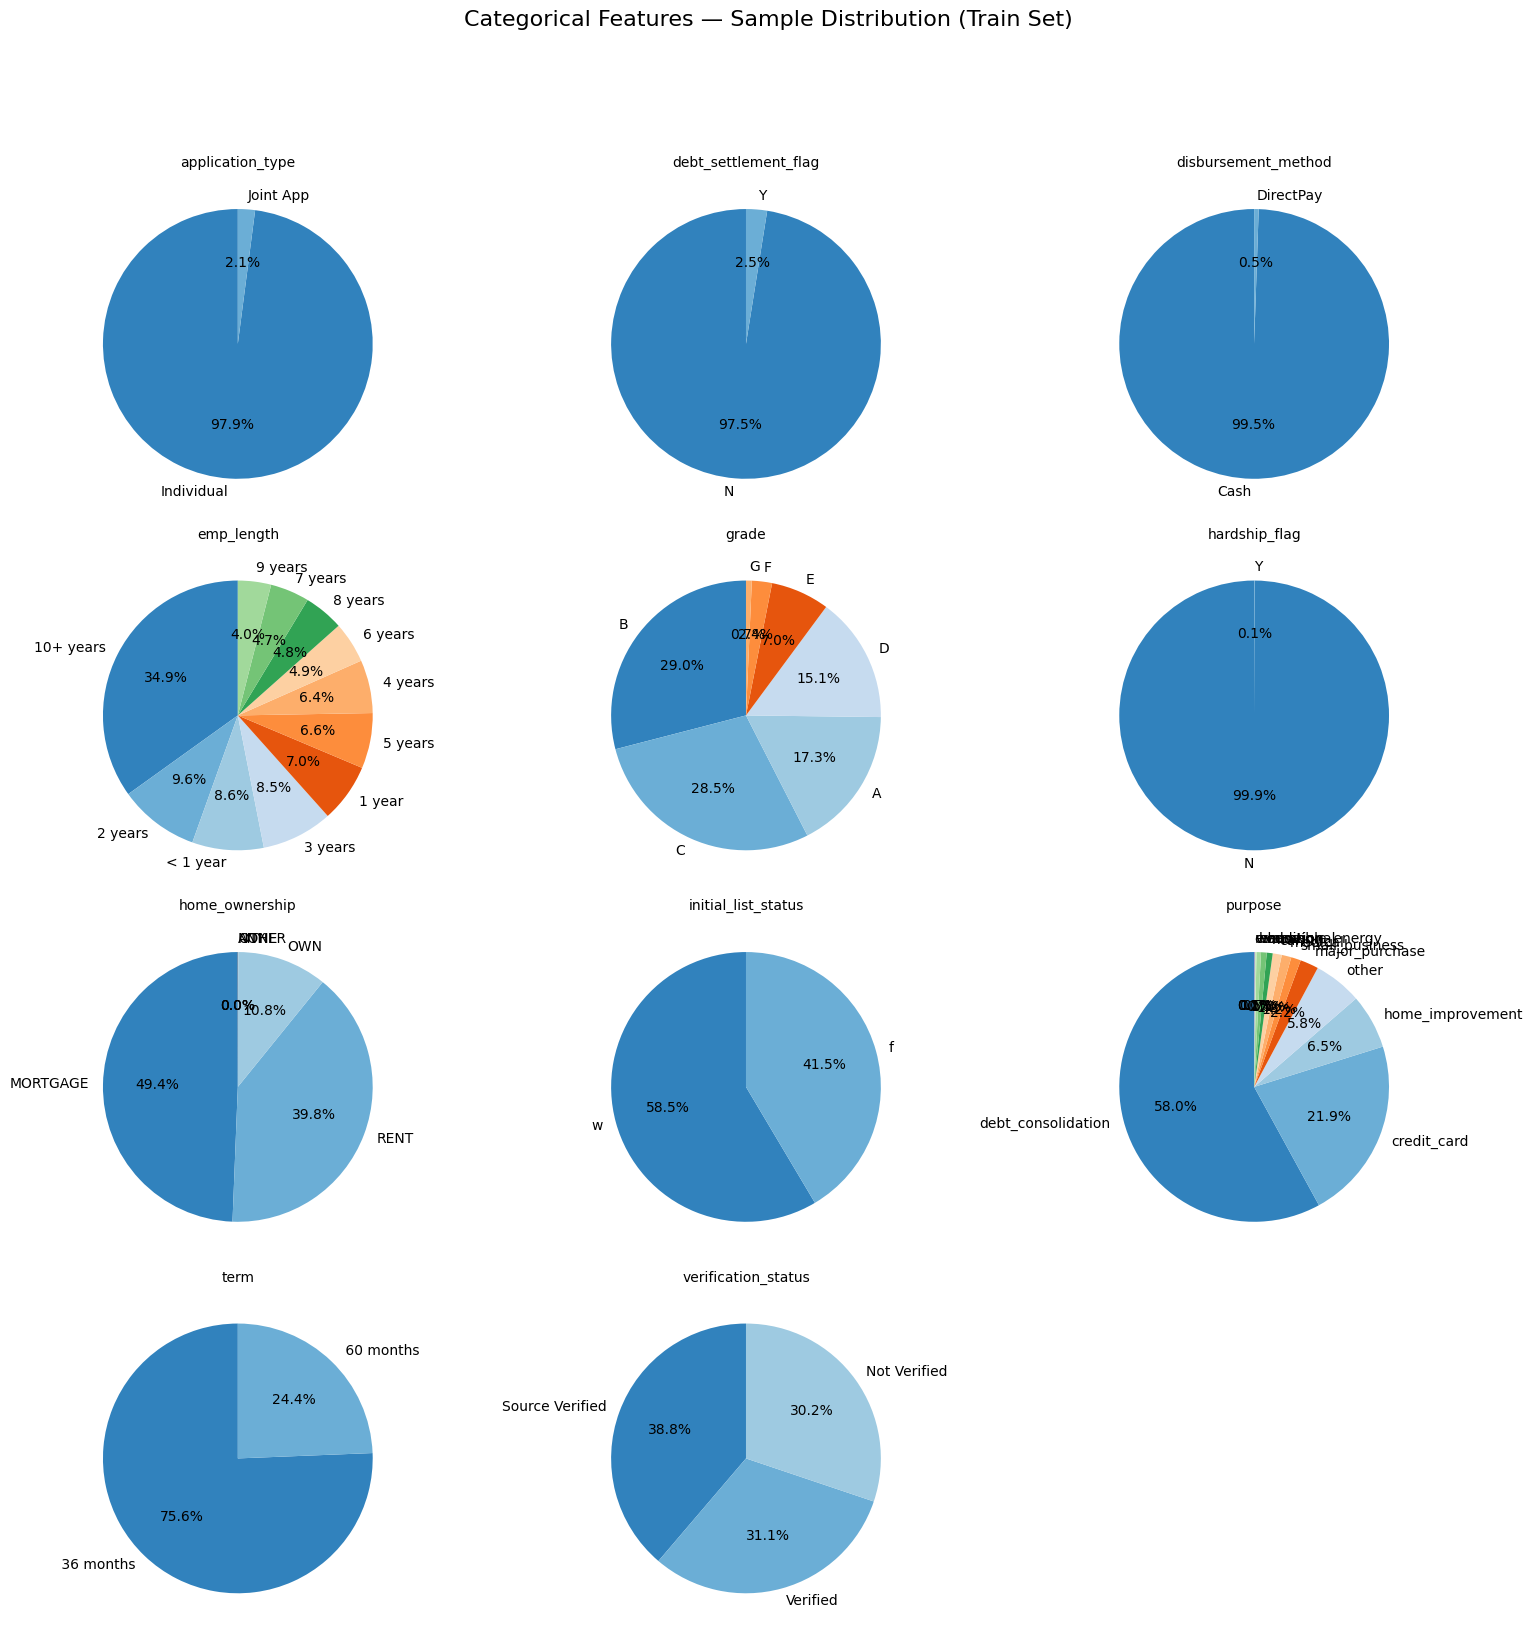

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# maximum number of levels to display
MAX_LEVELS = 20  
n_cols = 3

# set up categorical features
cat_cols = X_train.columns.difference(num_cols).tolist()
cat_list = [col for col in cat_cols if X_train[col].nunique(dropna=True) < MAX_LEVELS and X_train[col].nunique() > 1]  

n_rows = int(np.ceil(len(cat_list) / n_cols))

# create subplots for categorical features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()
fig.suptitle("Categorical Features — Sample Distribution (Train Set)", fontsize=16, y=1.02)

for i, col in enumerate(cat_list):
    ax = axes[i]

    # get the frequency of each category
    freq = train_df[col].astype('object').value_counts().head(MAX_LEVELS)

    # bar plot for frequency distribution
    ax.pie(freq, labels=freq.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20c(np.arange(len(freq))))
    ax.set_title(f"{col}", fontsize=10)

# close empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


/var/folders/xg/6886p3rj5kb44k2smttjctf80000gn/T/ipykernel_22445/3020974012.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = train_df.groupby(q)['default'].mean().sort_index()
/var/folders/xg/6886p3rj5kb44k2smttjctf80000gn/T/ipykernel_22445/3020974012.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = train_df.groupby(q)['default'].mean().sort_index()
/var/folders/xg/6886p3rj5kb44k2smttjctf80000gn/T/ipykernel_22445/3020974012.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current b

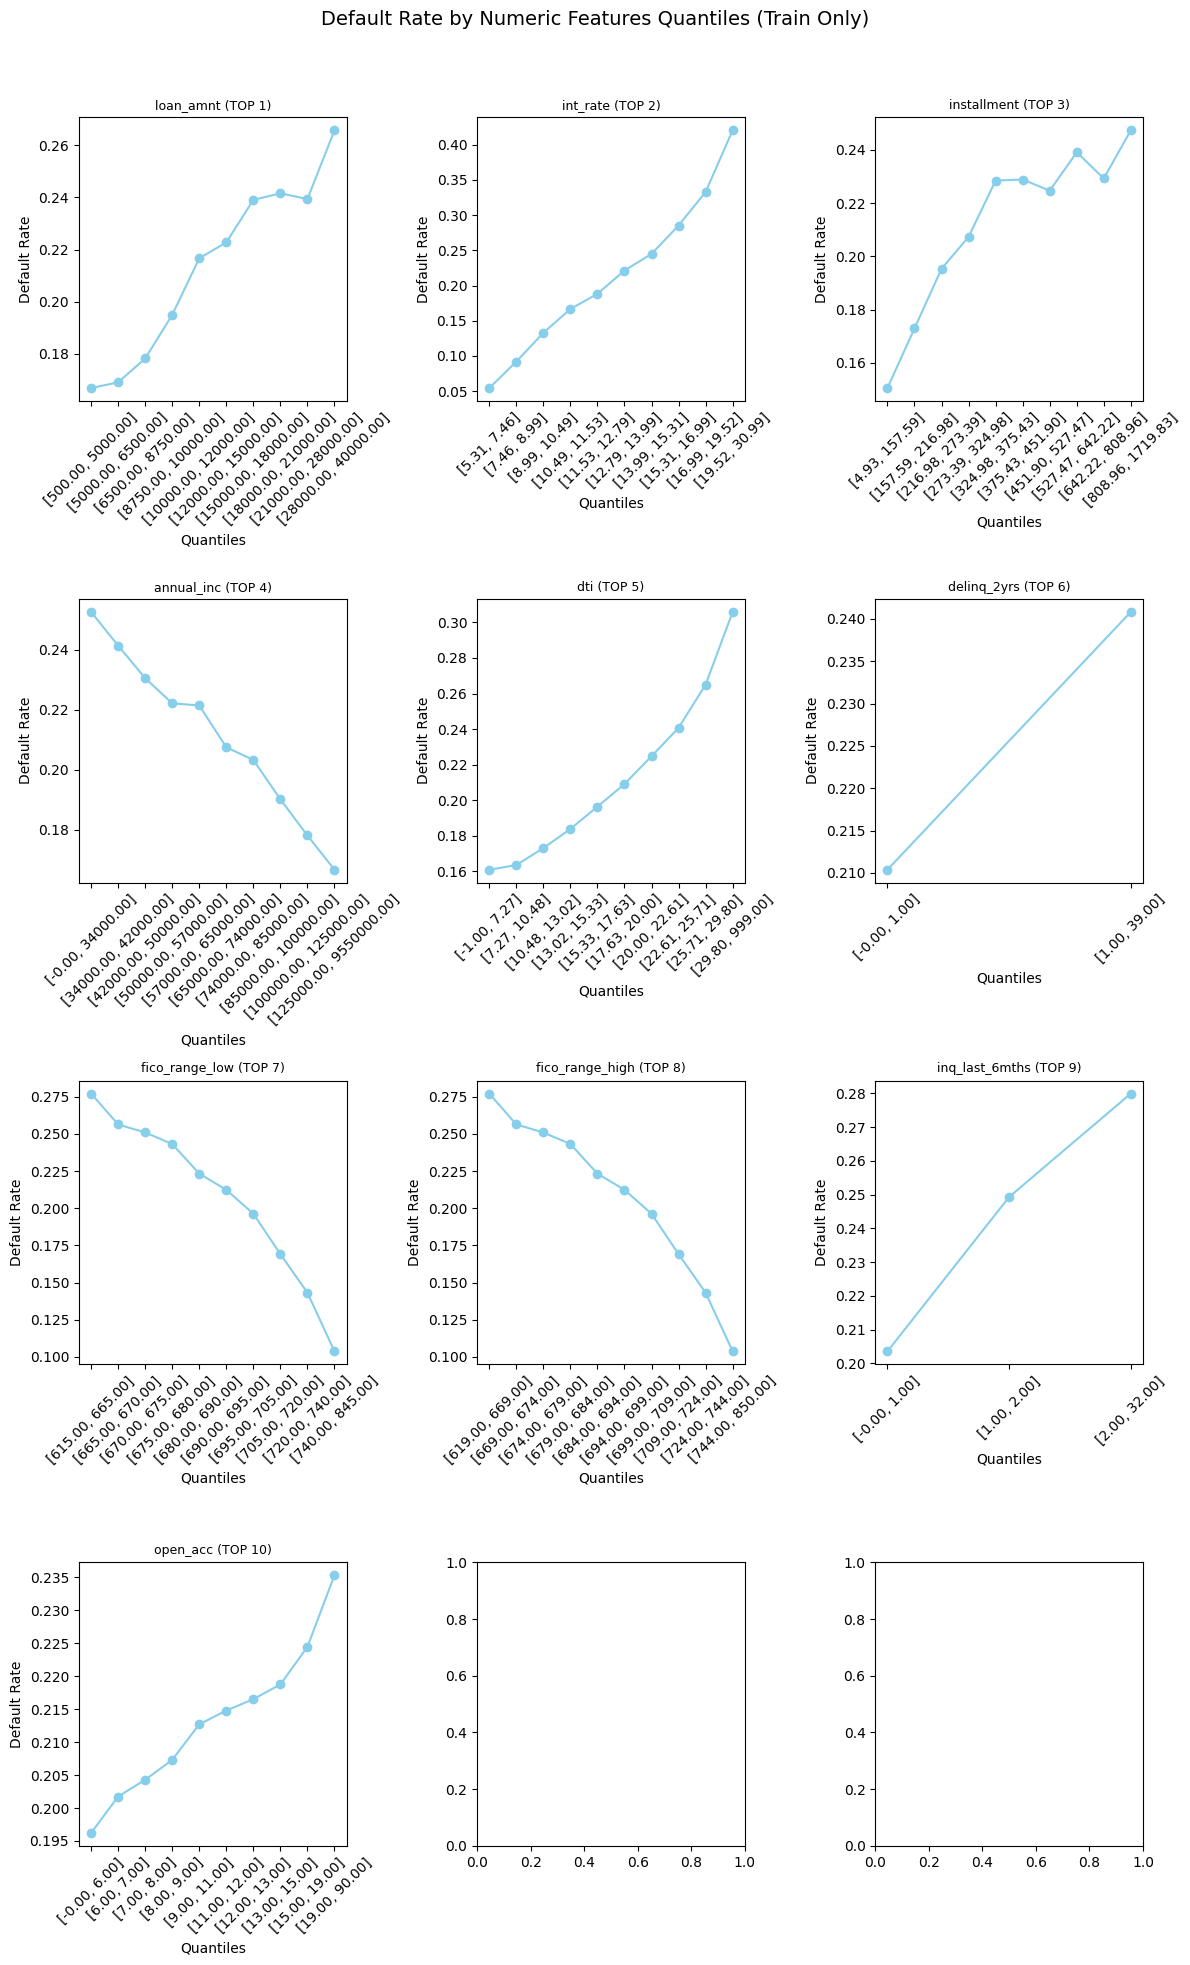

In [134]:
# quantile analysis for numeric features
TOP_Q = 10
fig4, axes = plt.subplots(4, 3, figsize=(12, 2*TOP_Q))
num_cols = [col for col in num_cols if train_df[col].nunique() > 2]  # Exclude columns with less than 3 unique values
fig4.suptitle("Default Rate by Numeric Features Quantiles (Train Only)", fontsize=14)

for i, col in enumerate(num_cols[:TOP_Q]):
    s = train_df[col].dropna()
    q = pd.qcut(s, q=10, duplicates='drop')  
    # calculate the default rate for each quantile
    trend = train_df.groupby(q)['default'].mean().sort_index()

    # draw the plot
    labels = [
        f"[{interval.left:.2f}, {interval.right:.2f}]" 
        for interval in q.cat.categories
    ]
    axes[i // 3, i % 3].plot(labels, trend.values, marker='o', color='skyblue')
    # print(f'{col} - Quantiles:\n{labels}')    
    axes[i // 3, i % 3].set_ylabel("Default Rate")
    axes[i // 3, i % 3].set_xlabel("Quantiles")
    axes[i // 3, i % 3].set_title(f'{col} (TOP {i+1})', fontsize=9)
    axes[i // 3, i % 3].tick_params(axis='x', labelrotation=45)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
